by Yuqing Zhang

# Question 1

In [1]:
import pandas as pd
data = pd.read_csv('dataset.csv')
# calculate average value for one piece of item
data['item_value'] = data['order_amount']/data['total_items']
data['order_amount'].describe().round(2)

count      5000.00
mean       3145.13
std       41282.54
min          90.00
25%         163.00
50%         284.00
75%         390.00
max      704000.00
Name: order_amount, dtype: float64

array([[<AxesSubplot:title={'center':'order_amount'}>]], dtype=object)

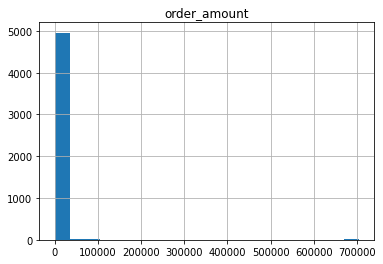

In [4]:
data.hist(bins = 20, column=['order_amount'])

array([[<AxesSubplot:title={'center':'item_value'}>]], dtype=object)

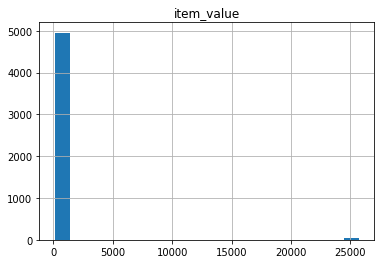

In [3]:
data.hist(bins = 20, column=['item_value'])

From the histogram we can see there exist outliers with extremely high order amount and extremely high item value.

Also I used tableau to see the order amount for each order id. It is clear to see that there are some outliers produced by user 607 with each order amount of 704000 (the blue dots). 

<div>
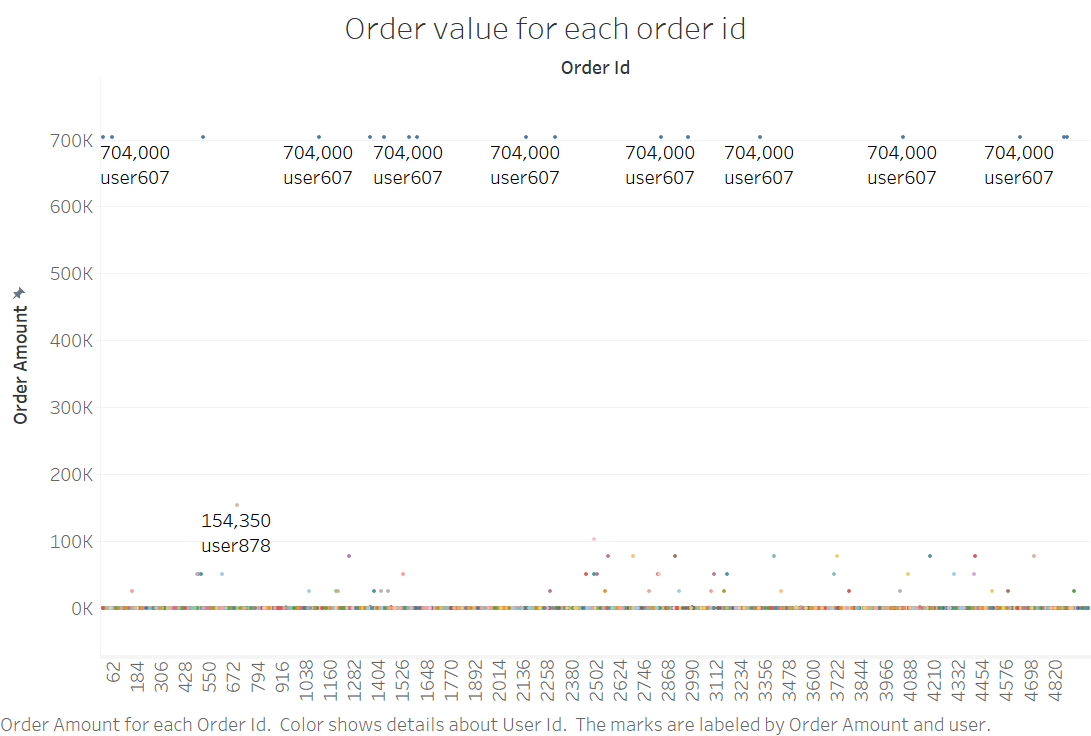
</div>

1. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

    There are some outliers (order amount = 704,000), which drag the mean to an insanely large value. 

    It is better to evaluate the data by median, instead of mean. 
    
    I also thought about using the trimmed mean (only truncate the right tails, i.e. the outliers), but it may be hard to control the percentage of trimming, which may need to change if we obtain more data. So overall I will choose to calculate the median of order amount. 


2. What metric would you report for this dataset?

    I would choose median. This attribute is more robust. 

3. What is its value?

    The value is \$284.

# Question 2

a. How many orders were shipped by Speedy Express in total?

    SELECT COUNT(*) FROM [Orders] 

    WHERE ShipperID = 

    (SELECT ShipperID FROM [Shippers] WHERE ShipperName = 'Speedy Express')
    

a ans: 54

b. What is the last name of the employee with the most orders?

    SELECT LastName FROM [Employees]

    WHERE EmployeeID = 

    (SELECT EmployeeID FROM [Orders]

    group by EmployeeID order by COUNT(*) 

    DESC LIMIT 1)
    

b ans: Peacock

c. What product was ordered the most by customers in Germany?

    SELECT ProductName FROM Products

    WHERE ProductID = 

    (SELECT ProductID FROM (

    SELECT * FROM [Orders] o, [OrderDetails] od

    WHERE o.OrderID = od.OrderID) 

    WHERE CustomerID IN (SELECT CustomerID FROM [Customers] WHERE Country = 'Germany') 

    GROUP BY ProductID ORDER BY SUM(Quantity) DESC LIMIT 1)
    

c ans: Boston Crab Meat